In [1]:
import math
import numpy as np
from tqdm import tqdm
import torch
import pickle

from helpers.data import get_pdf_toy, read_in_data
from helpers.ansatz import q

import matplotlib.pyplot as plt
from rikabplotlib.plot_utils import newplot, hist_with_errors, hist_with_errors

In [2]:
device = "cpu"

In [3]:
outfile_name = f"thrust_1_3d"

save_dict = {}


if "thrust" in outfile_name:

    with open(f"output_final/{outfile_name}_config", "rb") as ifile:
        save_dict["configs"] = pickle.load(ifile)
    
    losses = np.load(f"output_final/{outfile_name}_losses.npy")
    g_coeffs_log = np.load(f"output_final/{outfile_name}_g_coeffs.npy")
    theta_log = np.load(f"output_final/{outfile_name}_theta.npy")

else:
    with open(f"output_final/{outfile_name}_config", "rb") as ifile:
        save_dict["configs"] = pickle.load(ifile)
    
    losses = save_dict["loss"]
    g_coeffs_log = save_dict["g_coeffs"]
    theta_log = save_dict["theta"]
    
distribution = save_dict["configs"]["distribution"]
order_to_match = save_dict["configs"]["order_to_match"]
name = save_dict["configs"]["name"]
mstar = save_dict["configs"]["mstar"]


print(distribution)
print(save_dict["configs"])

titles = {
    "thrust" : r"Thrust @ " + r"$\mathcal{O}(\alpha_s^" + str(1) + "$)\t\t\t\t\t",
    "LO_thrust" : r"Thrust @ " + r"$\mathcal{O}(\alpha_s^" + str(1) + "$)\t\t\t\t\t",
          "angularity" : r"Pseudo-Angularity @ " + r"$\mathcal{O}(\alpha_s^" + str(2) + "$)\t\t\t\t\t",
        }

ylims = {"LO_thrust" : (-1.5, 1.1),
          "thrust" : (-1.5, 1.1),
          "angularity" : (-0.5, 1.1),
}

xlabels_t  = {"LO_thrust" : r"$t = \log(1/\tau)$",
               "thrust" : r"$t = \log(1/\tau)$",
               "angularity" : r"$t = \log(1/\lambda)$",
              }

run_toy = not ("thrust" in outfile_name)
print(f"Running toy: {run_toy}")


thrust
{'distribution': 'thrust', 'order_to_match': 1, 'name': '3d', 'mstar': 1, 'init_random': True, 'init_at_answer': False, 'init_close_to_answer': False, 'learn_theta': True, 'ratio_loss': False, 'use_logbins': False, 'n_bins': 100, 't_min': 0, 't_max': 7, 'epochs': 50000, 'batch_size': 249, 'lr': 0.01, 'seed': 42, 'm': 3, 'n': 3}
Running toy: False


In [4]:
# Helper functions ofr plotting

max_M, max_N = g_coeffs_log[0].shape


factorial_cache_n = torch.tensor([math.factorial(k) for k in range(max_N)], device=device).float()
factorial_cache_m = torch.tensor([math.factorial(k) for k in range(max_M)], device=device).float()
n_range = torch.arange(max_N, device=device)
m_range = torch.arange(1, max_M, device=device)

factorial_cache_info = factorial_cache_m, factorial_cache_n, m_range, n_range



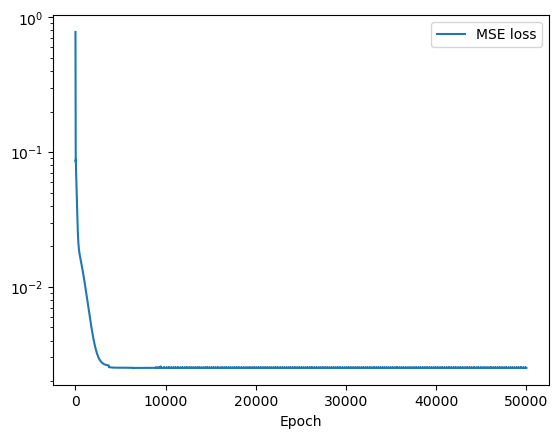

In [5]:


# Plot loss
plt.figure()
plt.plot(losses, label="MSE loss")
plt.legend()
plt.yscale("log")
plt.xlabel("Epoch")
plt.show()



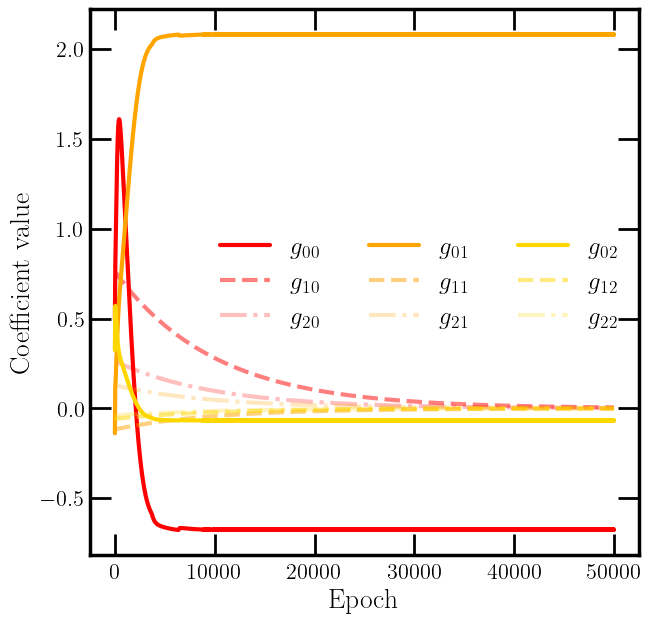

In [6]:


from matplotlib.pyplot import cm
color = iter(cm.hsv(np.linspace(0, 1, g_coeffs_log.shape[2]+1)))
opacities = [1.0, 0.5, 0.25]
linestyles = ["-", "--", "-."]

colors = ["red", "orange", "gold"]

fig, ax = newplot('full')
for n in range(g_coeffs_log.shape[2]):
    c = colors[n]
    for m in range(g_coeffs_log.shape[1]):
        label = f"$g_{{{m}{n}}}$"
        plt.plot(g_coeffs_log[:, m, n], label=label, color=c, alpha=opacities[m], linestyle=linestyles[m])
plt.legend(ncol = 3)#, title = "Thrust @ " + r"$\mathcal{O}(\alpha_s^" + str(order_to_match) + "$)\t\t\t\t\t")
plt.xlabel("Epoch")
plt.ylabel("Coefficient value")
# plt.ylim(ylims[distribution])
plt.savefig(f"figures/{outfile_name}_coeffs_nice.png", bbox_inches = "tight")

plt.show()



In [7]:

with open(f"data/pythia_distribution2.pkl", "rb") as ifile:
    pythia_data = pickle.load(ifile)
    pythia_data = pythia_data["thrusts"]


[0.0363067  0.09977988 0.02081196 ... 0.12278059 0.0687253  0.30136934]


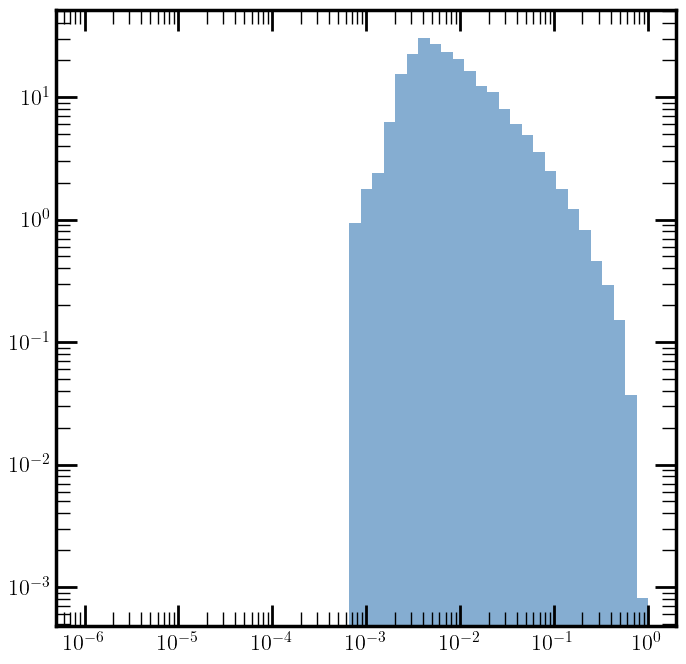

In [8]:

print(pythia_data * 2)
bins = np.logspace(-6, 0, 50)
plt.hist(pythia_data * 2, bins=bins, density=True, label="Pythia 8.306", alpha=0.5)
plt.yscale("log")
plt.xscale("log")


[[0.4572233]
 [0.       ]
 [0.       ]]
[[-6.75096273e-01  2.08098173e+00 -6.75801337e-02]
 [ 5.12550632e-03 -7.88000936e-04 -3.93976603e-04]
 [ 1.77153689e-03  8.60892935e-04 -2.63324007e-04]]
[[0.00512551 0.000788   0.00039398]
 [0.00177154 0.00086089 0.00026332]]
[[-0.67509627  0.5        -0.06758013]
 [ 1.7874965  -1.73414612  0.25285179]
 [-0.31333103  0.56125723  0.01199143]]
[[-0.67509627  0.5        -0.06758013]
 [10.71791055  1.16261178  0.25736805]
 [ 0.32092578  0.84580108 -0.04241137]]
[[-0.67509627  0.5        -0.06758013]
 [-4.62893633 -0.27463949  0.0713218 ]
 [-1.15925269 -0.09468152 -0.09150328]]
[[-0.67509627  0.5        -0.06758013]
 [ 0.53137053  1.41574875  0.14327805]
 [-1.45557528 -0.91162189 -0.02270174]]
[[-0.67509627  0.5        -0.06758013]
 [ 0.18067214 -0.2887253   0.34179292]
 [-3.66076598  0.57306404  0.0444543 ]]
[[-0.67509627  0.5        -0.06758013]
 [-4.27378352  0.02929268 -0.07229745]
 [ 0.37169653  1.8411354   0.14809037]]
[[-0.67509627  0.5       

(0.0, 1.5)

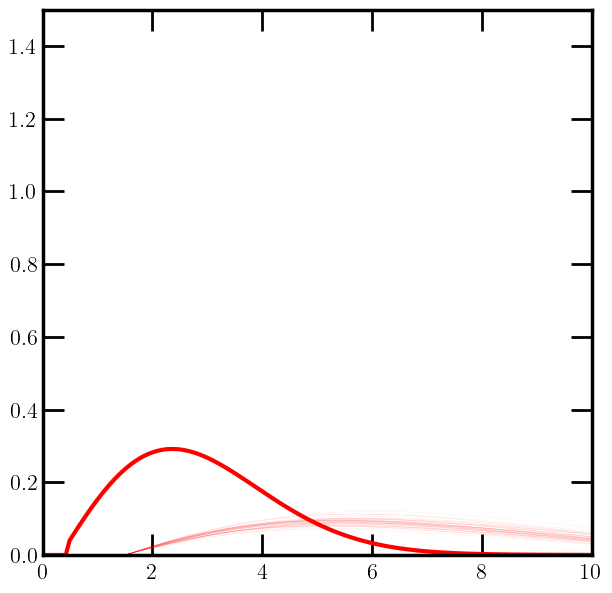

In [ ]:
# Test multiple g values

tt = torch.linspace(save_dict["configs"]["t_min"], 2 * save_dict["configs"]["t_max"], 200, device=device)
alpha = 0.117
alpha_tensor = torch.tensor(alpha, device=device)

print(theta_log[-1])

stds = np.abs(g_coeffs_log[-1, -2:])
print(g_coeffs_log[-1])
print(stds)

fig, ax = newplot('full')
plt.plot(  
       tt.detach().cpu().numpy(),q(tt, alpha_tensor, torch.tensor(g_coeffs_log[-1]).to(device), torch.tensor(theta_log[-1]).to(device), save_dict["configs"]["mstar"], save_dict["configs"]["t_min"], save_dict["configs"]["t_max"], device, factorial_cache_info), label="Ansatz",  color="red",
    )

for i in range(50):
    
    g_coeffs_copy = g_coeffs_log[-1].copy()
    g_coeffs_copy[-2:] = 1000*np.random.normal(np.zeros_like(g_coeffs_copy[-2:]), stds)
    g_coeffs_copy[0, 1] = 1.


    print(g_coeffs_copy)

    plt.plot(  
           tt.detach().cpu().numpy(),q(tt, alpha_tensor, torch.tensor(g_coeffs_copy).to(device), torch.tensor(theta_log[-1]).to(device), save_dict["configs"]["mstar"], save_dict["configs"]["t_min"], save_dict["configs"]["t_max"], device, factorial_cache_info), color="red", alpha=0.1, lw = 0.25
        )

plt.xlim(0, 10)
plt.ylim(0, 1.5)
# plt.yscale("log")


NameError: name 'data_dict' is not defined

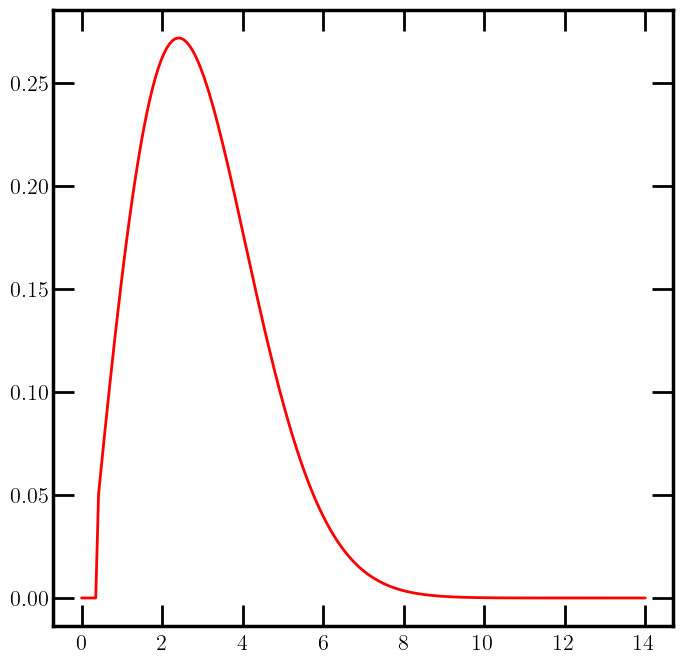

In [10]:
def Theta(t):
    return np.where(t > 0, 1, 0.0)

def f_t(t, alpha):
    return alpha * (-0.67 + 4 * t) * Theta(t - 0.41) * 4/3 / np.pi

def int_f_t(t, alpha):
    return 1 * alpha * (-0.67*Theta(t - 0.41)*(t - 0.41) + 4*Theta(t - 0.41)*((t)**2 - 0.41**2)/2 )  * 4/3 / np.pi


def q_t(t, alpha):
    return f_t(t, alpha) * np.exp(-int_f_t(t, alpha))





tt_np = tt.detach().cpu().numpy()
plt.plot(tt_np, q_t(tt_np, alpha), label="Toy", color="red", lw=2)


t_bins = torch.linspace(save_dict["configs"]["t_min"], 2 * save_dict["configs"]["t_max"], save_dict["configs"]["n_bins"], device=device)
t_bin_centers = 0.5 * (t_bins[1:] + t_bins[:-1])
plt.plot(t_bin_centers.detach().cpu().numpy(),data_dict["alpha_0117"].detach().cpu().numpy(),label="Target (MG5)",color="red", linestyle="dotted",)

plt.hist(np.log(1 / (2 * pythia_data)), density=True, bins=100, alpha=0.5, color = "lightcoral")



plt.xlabel(xlabels_t[distribution])

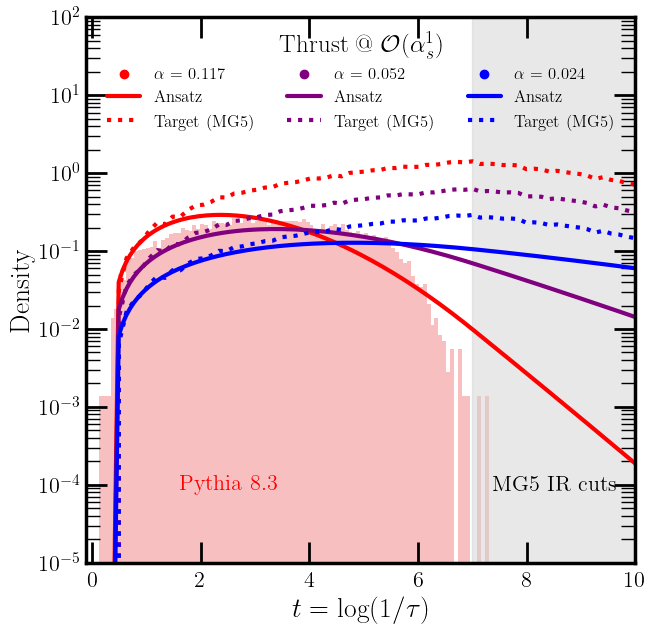

In [11]:






if save_dict["configs"]["use_logbins"]:
    print("Using log bins")
    t_bins = torch.logspace(
        np.log10(save_dict["configs"]["t_min"]), np.log10(save_dict["configs"]["t_max"]), save_dict["configs"]["n_bins"], device=device
    )
    t_bin_centers = torch.sqrt((t_bins[1:] * t_bins[:-1]))
else:
    t_bins = torch.linspace(save_dict["configs"]["t_min"], 2 * save_dict["configs"]["t_max"], save_dict["configs"]["n_bins"], device=device)
    t_bin_centers = 0.5 * (t_bins[1:] + t_bins[:-1])


if not run_toy:  # only needs to be done once
    data_dict = read_in_data([2], distribution, t_bins, device)
    #print(data_dict.keys())



tt = torch.linspace(save_dict["configs"]["t_min"], 2 * save_dict["configs"]["t_max"], 200, device=device)


colors = ["red", "purple", "blue"]


fig, ax = newplot("full")


alphas = [0.117, 0.052, 0.024]  # Corresponding to the three g_coeffs_log sets
if run_toy:
    alphas = [0.150, 0.100, 0.050]


for i, alpha in enumerate(alphas):
    alpha_tensor = torch.tensor(alpha, device=device)
    plt.scatter( 100, 100, label=f"$\\alpha$ = {alpha}",  color=colors[i])



    plt.plot(  
       tt.detach().cpu().numpy(),q(tt, alpha_tensor, torch.tensor(g_coeffs_log[-1]).to(device), torch.tensor(theta_log[-1]).to(device), save_dict["configs"]["mstar"], save_dict["configs"]["t_min"], save_dict["configs"]["t_max"], device, factorial_cache_info), label="Ansatz",  color=colors[i],
    )

    if run_toy:
        plt.plot(
            t_bin_centers.detach().cpu().numpy(),
            get_pdf_toy( alpha_tensor, distribution, t_bin_centers, -1, device).detach().cpu().numpy(), label="Leading Log", color=colors[i],  linestyle="dashed",
        )
        plt.scatter(
            t_bin_centers.detach().cpu().numpy(),get_pdf_toy(alpha_tensor, distribution, t_bin_centers,order_to_match,device) .detach().cpu() .numpy(),  color="white",  s=10, 
        )
        plt.scatter(
            t_bin_centers.detach().cpu().numpy(),get_pdf_toy(alpha_tensor, distribution, t_bin_centers,order_to_match,device) .detach().cpu() .numpy(), label=f"Target order $\\alpha^{order_to_match}$",  color=colors[i],  s=10, alpha = 0.35
        )

    else:
        alpha_string = "alpha_" + str(int(1000 * alpha)).zfill(4)
        plt.plot(t_bin_centers.detach().cpu().numpy(),data_dict[alpha_string].detach().cpu().numpy(),label="Target (MG5)",color=colors[i], linestyle="dotted",)
        # plt.plot(tt.detach().cpu().numpy(),get_pdf_toy(alpha_tensor, "thrust_TEST", tt, -1, device).detach() .cpu().numpy(),label="Leading Log", color=colors[i],linestyle="dashed",
        # )


        def LL(tt, alpha_tensor):

            t = tt.detach().cpu().numpy()
            alpha = alpha_tensor.detach().cpu().numpy()

            term_0 = alpha * 4/3 / np.pi
            term_1 = 4*t-3
            term_2 = np.exp((-4*t*2/ 2 + 3*t ) * term_0)
            return term_0 * term_1 * term_2
        
        # ys = LL(tt, alpha_tensor).astype(np.float32)
        # plt.plot(tt.detach().cpu().numpy(), ys, label="Leading Log", color=colors[i], linestyle="dashed")   

        # # Verify that the leading log is normalized
        # norm = torch.trapz(get_pdf_toy(alpha_tensor, "thrust_TEST", tt, -1, device), tt)
        # print(f"Leading log norm for alpha {alpha}: {norm.item()}")


plt.hist(np.log(1 / (2 * pythia_data)), density=True, bins=100, alpha=0.5, color = "lightcoral")

# shade in after t = 7
plt.axvspan(7, 10, color="lightgray", alpha=0.5)
plt.text(8.5, 0.0001, "MG5 IR cuts", fontsize=16, color="black", ha="center", va="center", rotation=0)
plt.text(2.5, 0.0001, "Pythia 8.3", fontsize=16, color="red", ha="center", va="center", rotation=0)

plt.axhline(0, color="black", linewidth=1.0)
plt.legend(loc = "upper center", ncol = 3, fontsize = 12, title = titles[distribution])
plt.xlabel(r"$t = \log(1/\tau)$")
plt.ylabel("Density")
plt.xlim(-0.1, 10)
plt.ylim(1e-5, 1e2)
plt.xlabel(xlabels_t[distribution])
plt.yscale("log")
plt.savefig(f"figures/{outfile_name}_results_nice.png", bbox_inches = "tight")

plt.show()

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
with open("event_records_LO_1.pkl", "rb") as ifile:
    data = pickle.load(ifile)
print(data.keys())


#print(data["alpha_0053"]["weight"])



FileNotFoundError: [Errno 2] No such file or directory: 'event_records_LO_1.pkl'

In [ ]:

x_0 = data["alpha_0197"]["c_parameter"]
x_1 = data["alpha_0460"]["c_parameter"]

loc_data_0 = [np.log(1.0 / (x + 1e-12)) for x in x_0]
loc_data_1 = [np.log(1.0 / (x + 1e-12)) for x in x_1]

bins =  np.linspace(0, 10, 20)

bin_width = bins[1] - bins[0]

#loc_data = [np.log(1.0 / ((2*(1-x)) + 1e-12)) for x in x]

plt.figure()


y_0, _ = np.histogram(loc_data_0, weights = data["alpha_0197"]["weight"], bins = bins)
y_1, _ = np.histogram(loc_data_1, weights = data["alpha_0460"]["weight"], bins = bins)

plt.step(bins[1:], y_0/bin_width)
plt.step(bins[1:], y_1/bin_width)

#plt.yscale("log")
plt.show()

In [ ]:

def f_toy(t, alpha):
    pstar =  (6*torch.exp(-y) + (4 / (1 - torch.exp(-y))))*torch.log((1 - 2*torch.exp(-y))/torch.exp(-y)) - 3 + 6*torch.exp(-y) + 9*torch.exp(-2*y)
    return  alpha* (4/3) * pstar / (2*np.pi)


tmin = 0
tmax = 10




t_bins = torch.linspace(tmin, tmax, 100)

qq = q(t_bin_centers, 0.1)


plt.figure()
plt.plot(t_bin_centers.detach().cpu().numpy(), qq.detach().cpu().numpy())
plt.xlabel("t")
plt.show()

In [ ]:
alpha = 0.1

y = alpha* (4/3) * (1.0 / (2*np.pi)) * (4*t_bin_centers - 3)*torch.exp(alpha* (4/3) * (1.0 / (2*np.pi))*(2*torch.pow(t_bin_centers, 2) -3*t_bin_centers))
